In [15]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
from sympy.abc import x, y, a, b


#Graficar un número complejo como vector

# z = 1 + 1j
# fig, ax = plt.subplots()
# ax.quiver(0,0,z.real,z.imag, angles = 'xy', scale_units = 'xy', scale = 1)
# ax.axis([-3,3,-3,3])
# ax.palette = 'Paired'
# plt.axhline(0, color='grey')
# plt.axvline(0, color='grey')
# plt.style.use('ggplot')
# plt.grid('white')
# print(abs(z))



# Graficas
Con las definiciones previas sabemos que el conjunto de Julia esta formado por números complejos que no tienden a infinito cuando son sometidos a $n$ composiciones de una función $f_c$ en si misma, con el siguiente programa podemos ver si tiene como input un complejo $z_0$ estará en el conjunto de Julia en $c$ o no, al estar tomando un número de iteraciones relativamente grande solo hay que comparar el valor de $|f^n_{c}(z)|$ con $n$ siendo $n$ el número de iteraciones, ese sería nuestro máximo en este momento, posteriormente vamos a tener un metodo mas sofisticado de determinar el "escape" hacía infinito de cualquiera de las composiciones en cualquier $z_0$.

En el input por favor ingrese un número complejo de la forma $\mathbf{x+yj}$, si lo ingresa con $\mathbf{x+yi}$ o como pareja ordenada le dará un error por la sintaxis que maneja Python para los números complejos.

El número (-1.01-0.25j) es parte del conjunto de Julia con constante (-1+0j)


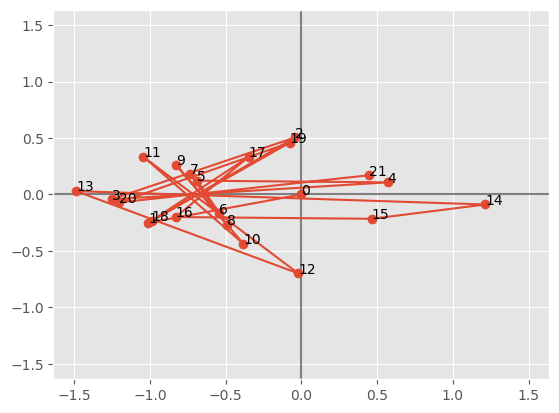

In [95]:
c = -1 + 0j
# z_0 = -1.01+0.25j
z_0 = complex(input('Ingrese un número complejo cercano a 0+0j'))
n = 20
   
def f_c(z):
    z =  z*z + c #._.
    return z

def comp(z,max_i):
    J = True
    iter = []
    iter.append(0+0j)
    iter.append(z)
    for i in range(max_i):
        z = f_c(z)
        if abs(z) <= max(abs(c),2):
            iter.append(z)
        else:
            J = False
            break
    if J:
        print("El número "+str(z_0)+" es parte del conjunto de Julia con constante "+str(c))
    else:
        print("El número "+str(z_0)+" no es parte del conjunto de Julia con constante"+str(c))
    return iter

iter = np.array(comp(z_0,n))
fig, ax = plt.subplots()
x = iter.real
y = iter.imag
dis = [] 

dis.append(abs(z_0))
for i in range(len(iter)):
    dis.append(abs(iter[i]))

dis_max = max(dis)
zoom = 1.1
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
ax.plot(x,y,'-o',label = str(np.where(iter == x+y)))

for i in range(len(iter)):
    ax.annotate(i, (x[i], y[i]))

plano = np.array([-dis_max,dis_max,-dis_max,dis_max])
ax.axis(zoom*plano)
plt.style.use('ggplot')
plt.grid('white')
plt.show()

El algoritmo para ver si un punto es o no parte del conjunto de Julia con el parametro $c$ esta basado en el algoritmo dado en el libro "Complex Dynamical System" de Robert L. Devaney, si quieren consuntarlo está en la pagina 10 del libro, más tarde demostraremos por inducción fuerte cómo es totalmente valido este algoritmo para el sistema dinamico de una función cuadratica iterada.